In [1]:
%load_ext watermark
%watermark

2020-09-08T22:15:23-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


### Descripción
Se usara el dataset del análisis exploratorio. <br><br>
El dataset consiste en información relativa a vehiculos vendidos en USA desde 1985. Dicha información incluye detalles tecnicos (cilindraje, tipo de transmisión, etc) y detalles ambientales como (consumo de gasolina y emisión de co2)

#### Conclusiones del análisis exploratorio
* Hay 1506 records duplicados
* Las variables desplazamiento, cilindros, transmision y tracción tienen valores inexistentes
* hay un outlier en las variables co2 y consumo
* Hay coches hibridos y coches electricos (se han removido estos ultimos ya que no contaminan)
* Ninguna variable numérica sigue una distribución normal

# Procesamiento de datos
una vez hecho el análisis exploratorio vamos a procesar estos datos para que este sea apropiado para entrenar modelos predictivos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
vehiculos = pd.read_csv("vehiculos_original.csv")
vehiculos = vehiculos.rename(columns={
    "make":"fabricante",
    "model":"modelo",
    "displ":"desplazamiento", #volumen de desplazamiento del motor
    "cylinders":"cilindros",
    "trany":"transmision",
    "drive":"traccion",
    "VClass":"clase",
    "fuelType":"combustible",
    "comb08":"consumo",
    "co2TailpipeGpm":"co2"
}
).query("co2>0")
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [4]:
vehiculos.shape

(38297, 11)

### Records duplicados
Usamos la función de pandas drop_duplicates() para remover los record duplicados

In [5]:
vehiculos = vehiculos.drop_duplicates()

In [6]:
vehiculos.shape

(36791, 11)

## valores extremos (outliers)

In [7]:
from scipy import stats
import numpy as np

def valores_extremos(df):
    for columna in df:
        if df[columna].dtype != np.object:
            num_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])
            print("{} | {} | {}".format(
                df[columna].name,
                num_outliers,
                df[columna].dtype
            ))

In [8]:
valores_extremos(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


/home/buitrago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


Eliminamos los outliers

In [9]:
vehiculos.describe()

,year,desplazamiento,cilindros,consumo,co2
count,36791.000000,36789.000000,36788.000000,36791.000000,36791.000000
mean,2000.787421,3.321786,5.746493,20.012068,473.185008
std,10.374662,1.359945,1.758009,5.109608,118.833905
min,1984.000000,0.600000,2.000000,7.000000,29.000000
25%,1991.000000,2.200000,4.000000,17.000000,386.391304
50%,2002.000000,3.000000,6.000000,19.000000,466.000000
75%,2010.000000,4.300000,6.000000,23.000000,555.437500
max,2018.000000,8.400000,16.000000,58.000000,1269.571429


In [10]:
consumo_min = vehiculos.consumo.mean() - 3*vehiculos.consumo.std()
consumo_max = vehiculos.consumo.mean() + 3*vehiculos.consumo.std()
print(consumo_min, consumo_max)

4.6832452329136025 35.34089110477768


In [11]:
co2_min = vehiculos.co2.mean() - 3*vehiculos.co2.std()
co2_max = vehiculos.co2.mean() + 3*vehiculos.co2.std()
print(co2_min,co2_max)

116.68329326817047 829.6867227313555


In [12]:
vehiculos = vehiculos[np.abs(stats.zscore(vehiculos.consumo)) < 3]
vehiculos = vehiculos[np.abs(stats.zscore(vehiculos.co2)) < 3]
#vehiculos = vehiculos[(vehiculos.co2>co2_min) & (vehiculos.co2<co2_max)]
#vehiculos = vehiculos[(vehiculos.consumo>consumo_min) & (vehiculos.consumo<consumo_max)]
vehiculos.shape

(36184, 11)

In [13]:
vehiculos.describe()

,year,desplazamiento,cilindros,consumo,co2
count,36184.000000,36182.000000,36181.000000,36184.000000,36184.000000
mean,2000.798834,3.326032,5.750228,19.842610,473.432460
std,10.342349,1.340791,1.733421,4.587005,110.892725
min,1984.000000,0.900000,2.000000,9.000000,144.000000
25%,1991.000000,2.200000,4.000000,17.000000,394.000000
50%,2002.000000,3.000000,6.000000,19.000000,467.736842
75%,2010.000000,4.300000,6.000000,23.000000,552.000000
max,2018.000000,8.400000,12.000000,35.000000,807.909091


In [14]:
valores_extremos(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 213 | int64
co2 | 423 | float64


/home/buitrago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [15]:
vehiculos = vehiculos[np.abs(stats.zscore(vehiculos.consumo)) < 3]
vehiculos = vehiculos[np.abs(stats.zscore(vehiculos.co2)) < 3]
vehiculos.shape

(35547, 11)

In [16]:
valores_extremos(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 0 | int64
co2 | 8 | float64


/home/buitrago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [17]:
vehiculos = vehiculos[np.abs(stats.zscore(vehiculos.consumo)) < 3]
vehiculos = vehiculos[np.abs(stats.zscore(vehiculos.co2)) < 3]
vehiculos.shape

(35539, 11)

In [18]:
valores_extremos(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 0 | int64
co2 | 0 | float64


/home/buitrago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [19]:
vehiculos.describe()

,year,desplazamiento,cilindros,consumo,co2
count,35539.000000,35537.000000,35536.000000,35539.000000,35539.000000
mean,2000.893188,3.308602,5.727572,19.863277,470.607342
std,10.308730,1.318268,1.705598,4.383492,104.425820
min,1984.000000,1.000000,2.000000,10.000000,169.000000
25%,1991.000000,2.200000,4.000000,17.000000,396.000000
50%,2002.000000,3.000000,6.000000,19.000000,465.000000
75%,2010.000000,4.300000,6.000000,23.000000,525.000000
max,2018.000000,8.400000,12.000000,33.000000,782.000000


## Valores inexistentes

In [20]:
num_records = len(vehiculos)
def valores_inexistentes(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()])/(1.0*num_records), df[columna].dtype
        ))
valores_inexistentes(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 5.627620360730465e-05 | float64
cilindros | 8.441430541095698e-05 | float64
transmision | 2.8138101803652325e-05 | object
traccion | 0.02093474774191733 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


Muchos algoritmos de machine learning requieren de que en el dataset no se tengan valores inexistentes
1. Eliminar records con valores inexistentes

In [21]:
vehiculos_sin_null = vehiculos.dropna(subset=["desplazamiento", "cilindros", "traccion", "transmision"])
vehiculos_sin_null.shape

(34791, 11)

2. Reemplazar los valores inexistentes con un valor en particular como 0 o "no registrado"

In [22]:
vehiculos["transmision_imp"] = vehiculos.transmision.fillna("sin transmision")
vehiculos["desplazamiento_imp"] = vehiculos.desplazamiento.fillna(0)
vehiculos["cilindros_imp"] = vehiculos.cilindros.fillna(0)
vehiculos["traccion_imp"] = vehiculos.traccion.fillna(vehiculos.traccion.mode())

vehiculos[vehiculos.transmision_imp == "sin transmision"]

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,transmision_imp,desplazamiento_imp,cilindros_imp,traccion_imp
15458,GMC,C25 Pickup 2WD,1984,4.1,6.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,sin transmision,4.1,6.0,2-Wheel Drive


3. Imputación de datos. Reemplazar valores inexistentes por un valor en particular, la imputación de datos generalmente se hace sobre una variable se hace sobre la media, la moda o la mediana. (más comun y más recomendable)

In [23]:
vehiculos.transmision = vehiculos.transmision.fillna(vehiculos.transmision.mode().values[0])
vehiculos.desplazamiento = vehiculos.desplazamiento.fillna(vehiculos.desplazamiento.median())
vehiculos.cilindros = vehiculos.cilindros.fillna(vehiculos.cilindros.mode().values[0])
vehiculos.traccion = vehiculos.traccion.fillna(vehiculos.traccion.mode().values[0])

In [24]:
vehiculos[vehiculos.transmision_imp == "sin transmision"]

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,transmision_imp,desplazamiento_imp,cilindros_imp,traccion_imp
15458,GMC,C25 Pickup 2WD,1984,4.1,6.0,Automatic 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,sin transmision,4.1,6.0,2-Wheel Drive


In [25]:
vehiculos = vehiculos.drop(["transmision_imp","desplazamiento_imp","cilindros_imp","traccion_imp"], axis=1)

In [26]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
5,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
6,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


## normalización y estandarización de variables
Hay dos formas en las cuales un dataset puede tener variables que haya que modificar pese a que no sean nulas/repetidas.

In [27]:
vehiculos.describe()

,year,desplazamiento,cilindros,consumo,co2
count,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000
mean,2000.893188,3.308585,5.727426,19.863277,470.607342
std,10.308730,1.318233,1.705600,4.383492,104.425820
min,1984.000000,1.000000,2.000000,10.000000,169.000000
25%,1991.000000,2.200000,4.000000,17.000000,396.000000
50%,2002.000000,3.000000,6.000000,19.000000,465.000000
75%,2010.000000,4.300000,6.000000,23.000000,525.000000
max,2018.000000,8.400000,12.000000,33.000000,782.000000


En este caso hay variables como "co2" cuyo rango es mucho mayor que el de "cilindros" y un modelo predictivo podría darle mucho más peso solo porque sus valores son más elevados.

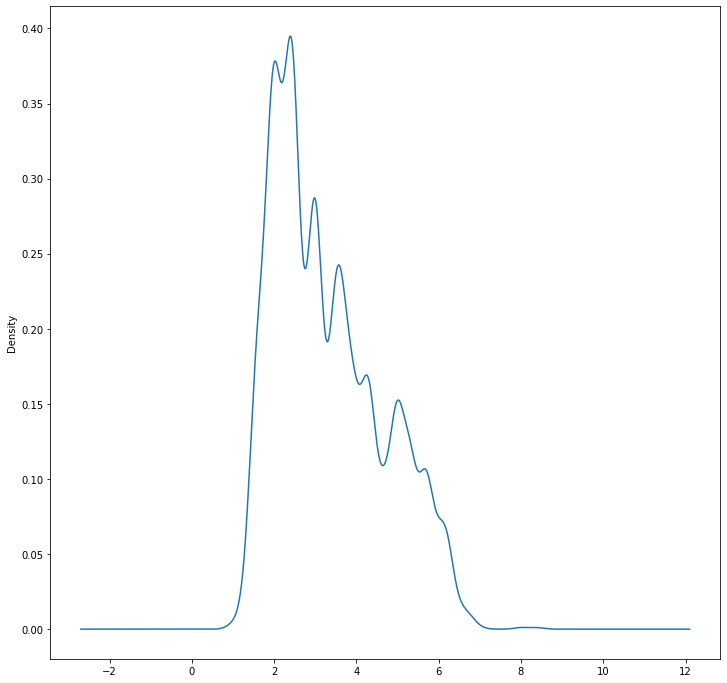

In [28]:
vehiculos.desplazamiento.plot.kde()

In [29]:
from scipy import stats

In [30]:
stats.skew(vehiculos.desplazamiento)

0.6267820075196722

Se pueden notar dos cosas:
1. Para las variables "co2" y "cilindros" el rango es muy diferente lo que puede afectar los modelos predictivos.
2. El coeficiente de simetria de la variable desplazamiento es muy grande lo cual nos indica que la variable no se distribuye de forma correcta por lo cual los modelos no podran llegar a una solución optima.
Para solucionar esto se pueden hacer dos cosas
1. Normalizar la variable.
2. Estandarizar la variable.

## Normalización
Lo que se busca es tomar una variable y convertirla a un rango [0,1], muchos modelos de deep learning exigen esto como requisito
$$normalizado = \dfrac{x-min}{max-min}$$

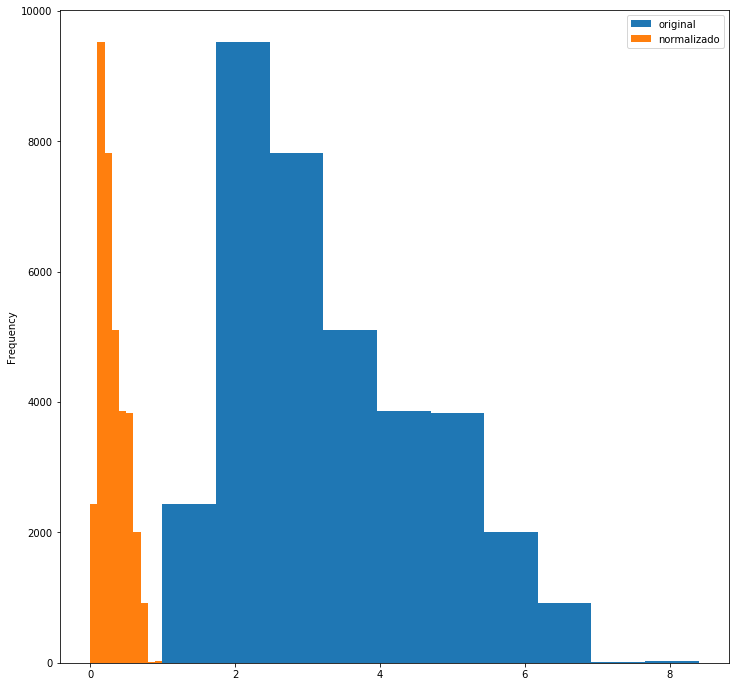

In [31]:
desplazamiento_x_min = vehiculos.desplazamiento.min()
desplazamiento_x_max = vehiculos.desplazamiento.max()

desplazamiento_original = vehiculos.desplazamiento
desplazamiento_normalizado = desplazamiento_original.apply(lambda x:(x-desplazamiento_x_min) / (desplazamiento_x_max - desplazamiento_x_min))
desplazamiento_original.plot.hist(label="original")
desplazamiento_normalizado.plot.hist(label="normalizado")
plt.legend()

## Estandarizacion
El objetivo de la estandarización es reescalar la variable a una distribución normal estandas con media 0 y desviación estandar 1. 

Muchos algoritmos para realizar predicciones requieren que la variable se encuentre completamente estandarizada, es decir, que tenga una distribución normal. [esta libreria lo requiere](https://scikit-learn.org/stable/) y es la libreria principal de machine learning.

Para estandarizar una variable requerimos hacer uso del coeficiente Z, con la formula:

$$Z = \dfrac{x-\mu}{\sigma}$$

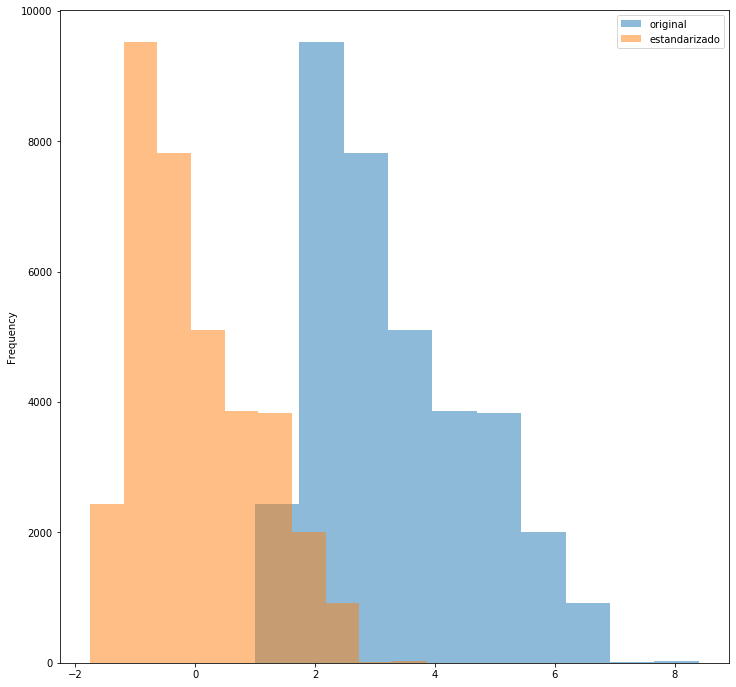

In [32]:
desplazamiento_mu = vehiculos.desplazamiento.mean()
desplazamiento_sigma = vehiculos.desplazamiento.std()

desplazamiento_estandarizado = desplazamiento_original.apply(lambda x: (x-desplazamiento_mu)/desplazamiento_sigma)

desplazamiento_original.plot.hist(label="original", alpha=0.5)
desplazamiento_estandarizado.plot.hist(label="estandarizado", alpha=0.5)
plt.legend()

###### ¿cómo saber si debemos utilizar normalización o estandarización?
1. Si el algoritmo que queremos utilizar para el modelo predictivo exije que la variable este estandarizada o normalizada pues debemos utilizar el metodo que el algoritmo requiera.
2. La normalización tiene el problema de que la distancia entre valores del dataset se reduce mucho ya que el rango de la variable se reduce del original a [0,1]

In [33]:
consumo_original = vehiculos.consumo

consumo_media = vehiculos.consumo.mean()
consumo_std = vehiculos.consumo.std()
consumo_min = vehiculos.consumo.min()
consumo_max = vehiculos.consumo.max()

consumo_normalizado = consumo_original.apply(lambda x: (x-consumo_min)/(consumo_max-consumo_min))
consumo_estandarizado = consumo_original.apply(lambda x: (x-consumo_media)/(consumo_std))

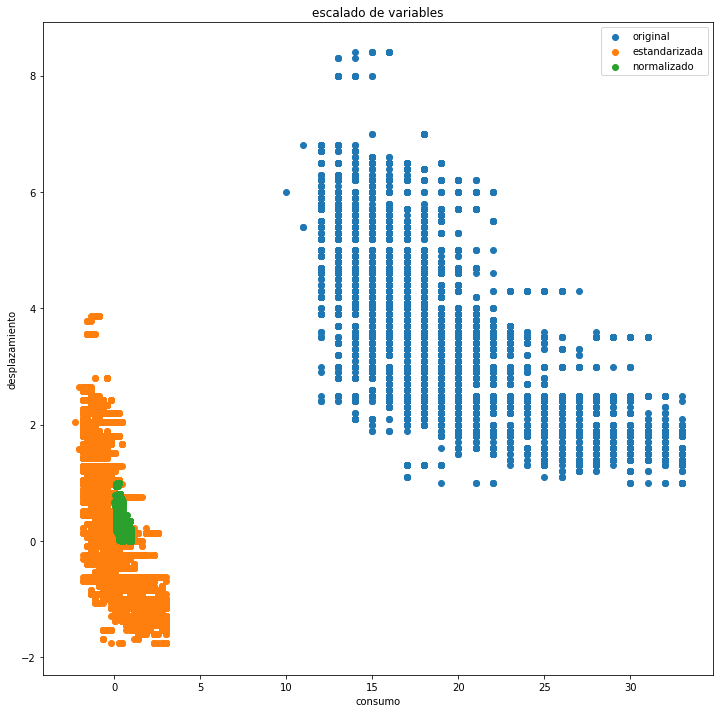

In [34]:
plt.scatter(x=consumo_original,y=desplazamiento_original,label="original")
plt.scatter(x=consumo_estandarizado, y=desplazamiento_estandarizado, label="estandarizada")
plt.scatter(x=consumo_normalizado, y=desplazamiento_normalizado, label="normalizado")
plt.xlabel("consumo")
plt.ylabel("desplazamiento")
plt.title("escalado de variables")
plt.legend()

Las variables no han cambiado. Sin embargo al normalizar se obtiene una distribución más representativa de la real que al normalizar. Sin embargo en ocasiones (también dependiendo del algoritmo que queramos utilizar) es mejor normalizar

In [35]:
vehiculos["desplazamiento_std"] = desplazamiento_estandarizado
vehiculos["consumo_std"] = consumo_estandarizado

In [36]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,desplazamiento_std,consumo_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.613385,-0.653195
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,0.676220,-1.565710
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.613385,-0.881324
5,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,0.676220,-1.565710
6,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,0.372783,-0.881324


In [37]:
vehiculos.to_csv("vehiculos_procesado.csv")